In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [2]:
d1=pd.read_csv("C:/Users/Rehaman shaik/Desktop/data science practice session/assisgments/Decision Trees/Fraud_check.csv")
d1

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [3]:
d1.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [4]:
d1.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


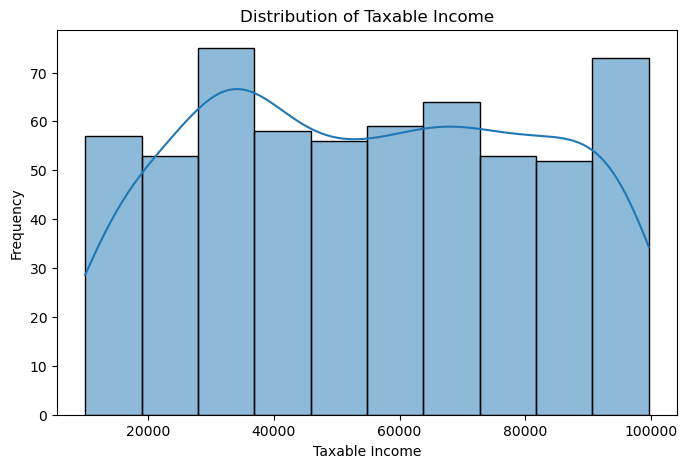

In [5]:
plt.figure(figsize=(8, 5))
sns.histplot(d1["Taxable.Income"], bins=10, kde=True)
plt.title("Distribution of Taxable Income")
plt.xlabel("Taxable Income")
plt.ylabel("Frequency")
plt.show()

In [6]:
# Count plot for categorical variables 'Undergrad', 'Marital.Status', and 'Urban'

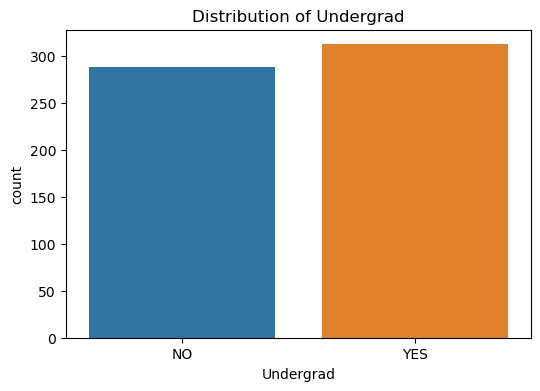

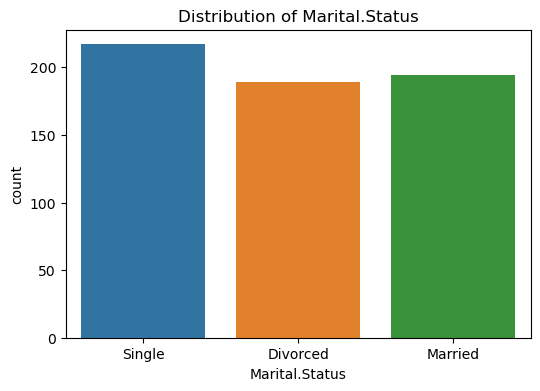

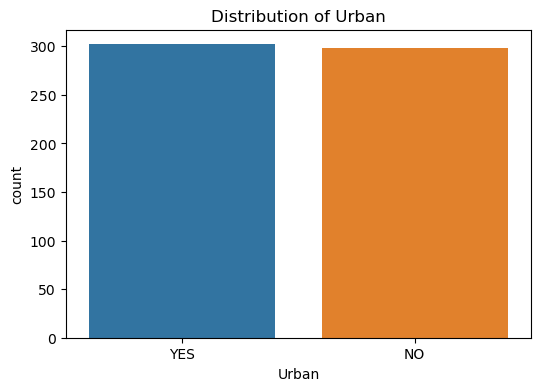

In [8]:
categorical_columns = ['Undergrad', 'Marital.Status', 'Urban']
for column in categorical_columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=column, data=d1)
    plt.title(f'Distribution of {column}')
    plt.show()

In [9]:
# Box plot for 'Taxable.Income'

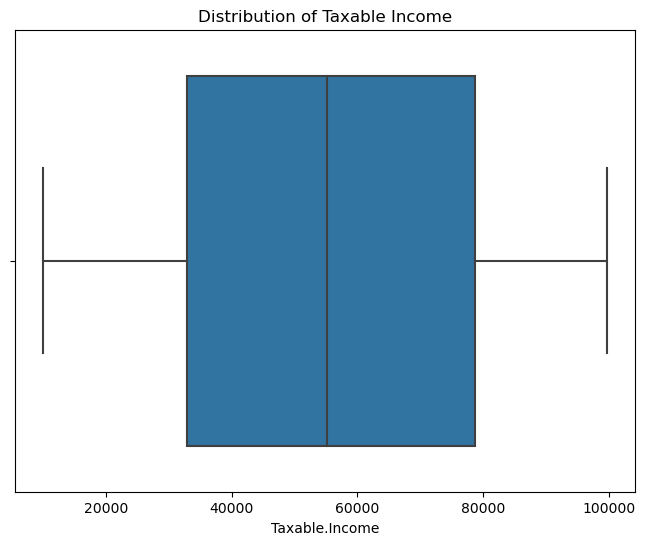

In [10]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Taxable.Income', data=d1)
plt.title('Distribution of Taxable Income')
plt.show()

In [11]:
# Box plot for 'City.Population'

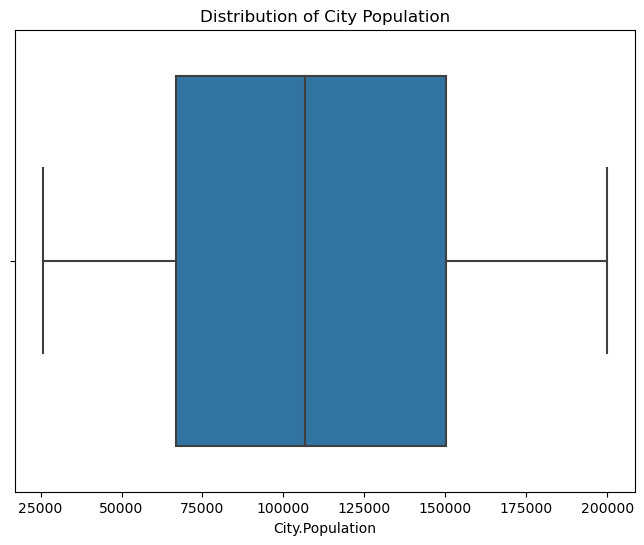

In [12]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='City.Population', data=d1)
plt.title('Distribution of City Population')
plt.show()


In [13]:
# Box plot for 'Work.Experience'

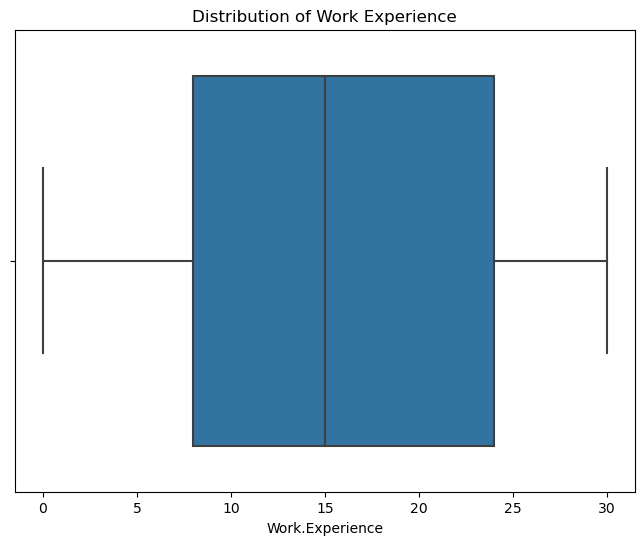

In [14]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Work.Experience', data=d1)
plt.title('Distribution of Work Experience')
plt.show()

In [15]:
y=d1["Taxable.Income"]
y

0      68833
1      33700
2      36925
3      50190
4      81002
       ...  
595    76340
596    69967
597    47334
598    98592
599    96519
Name: Taxable.Income, Length: 600, dtype: int64

In [16]:
threshold=30000

In [17]:
y = y.apply(lambda x: 'Risky' if x <= threshold else 'Good')
y

0      Good
1      Good
2      Good
3      Good
4      Good
       ... 
595    Good
596    Good
597    Good
598    Good
599    Good
Name: Taxable.Income, Length: 600, dtype: object

In [18]:
x=d1.drop("Taxable.Income",axis=1)

In [19]:
x

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,NO,Single,50047,10,YES
1,YES,Divorced,134075,18,YES
2,NO,Married,160205,30,YES
3,YES,Single,193264,15,YES
4,NO,Married,27533,28,NO
...,...,...,...,...,...
595,YES,Divorced,39492,7,YES
596,YES,Divorced,55369,2,YES
597,NO,Divorced,154058,0,YES
598,YES,Married,180083,17,NO


In [20]:
#Data preprocessing

In [21]:
for columns in x.columns:
    if columns in ["Undergrad","Marital.Status","Urban"]:
        from sklearn.preprocessing import LabelEncoder
        le=LabelEncoder()
        x[columns]=le.fit_transform(x[columns])
x

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0
...,...,...,...,...,...
595,1,0,39492,7,1
596,1,0,55369,2,1
597,0,0,154058,0,1
598,1,1,180083,17,0


In [22]:
training_Accuracy=[]
testing_accuracy=[]

In [23]:
#cross validation with Decision tree classifer

In [24]:
for i in range(1,101):
    x_train,x_test,y_train,y_test=train_test_split(x, y,test_size=0.30,random_state=i)
    dc=DecisionTreeClassifier()
    dc.fit(x_train,y_train)
    y_pred_train=dc.predict(x_train)
    y_pred_test=dc.predict(x_test)
    testing_accuracy.append(accuracy_score(y_train, y_pred_train))
    training_Accuracy.append(accuracy_score(y_test, y_pred_test))

In [25]:
print("average training accuracy :",np.mean(training_Accuracy))
print("average testing accuracy :",np.mean(testing_accuracy))

average training accuracy : 0.6408888888888888
average testing accuracy : 1.0


In [26]:
if np.mean(testing_accuracy) > 0.8:
    print("The SVM model demonstrates a satisfactory level of accuracy on the testing set.")
    print("It appears to generalize well to new, unseen data.")
else:
    print("While the training accuracy is relatively high, the testing accuracy is slightly lower.")
    print("This could indicate a potential issue with overfitting or the need for model fine-tuning.")
    print("Consider adjusting hyperparameters or exploring other algorithms for further improvement.")


The SVM model demonstrates a satisfactory level of accuracy on the testing set.
It appears to generalize well to new, unseen data.
